In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv(r"C:\Users\Lenovo\OneDrive\Documents\Data set\MLL\archive (1)\NFLX.csv")

In [3]:
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [4]:
df.shape

(1009, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


In [6]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

## Working with Date Column

In [8]:
df['Date']=pd.to_datetime(df['Date'])

In [9]:
df['year']=df['Date'].dt.year
df['month']=df['Date'].dt.month
df['day']=df['Date'].dt.day

In [16]:
df.head(3)

,Open,High,Low,Close,Adj Close,Volume,year,month,day
0,262.000000,267.899994,250.029999,254.259995,254.259995,11896100,2018,2,5
1,247.699997,266.700012,245.000000,265.720001,265.720001,12595800,2018,2,6
2,266.579987,272.450012,264.329987,264.559998,264.559998,8981500,2018,2,7


In [15]:
df.drop('Date',axis=1,inplace=True)

In [18]:
corr=df.corr()
corr

,Open,High,Low,Close,Adj Close,Volume,year,month,day
Open,1.000000,0.998605,0.998508,0.996812,0.996812,-0.415838,0.809151,0.130646,-0.014462
High,0.998605,1.000000,0.998203,0.998551,0.998551,-0.400699,0.810559,0.129469,-0.015013
Low,0.998508,0.998203,1.000000,0.998544,0.998544,-0.432116,0.809264,0.131444,-0.013412
Close,0.996812,0.998551,0.998544,1.000000,1.000000,-0.413362,0.810160,0.129959,-0.014870
Adj Close,0.996812,0.998551,0.998544,1.000000,1.000000,-0.413362,0.810160,0.129959,-0.014870
Volume,-0.415838,-0.400699,-0.432116,-0.413362,-0.413362,1.000000,-0.401308,-0.115963,0.090775
year,0.809151,0.810559,0.809264,0.810160,0.810160,-0.401308,1.000000,-0.120315,-0.015602
month,0.130646,0.129469,0.131444,0.129959,0.129959,-0.115963,-0.120315,1.000000,0.006903
day,-0.014462,-0.015013,-0.013412,-0.014870,-0.014870,0.090775,-0.015602,0.006903,1.000000


<Axes: >

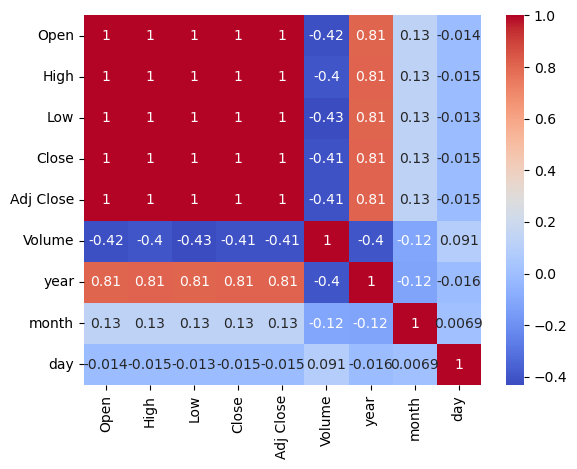

In [20]:
sns.heatmap(corr,annot=True,cmap='coolwarm',cbar=True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1009 non-null   float64
 1   High       1009 non-null   float64
 2   Low        1009 non-null   float64
 3   Close      1009 non-null   float64
 4   Adj Close  1009 non-null   float64
 5   Volume     1009 non-null   int64  
 6   year       1009 non-null   int32  
 7   month      1009 non-null   int32  
 8   day        1009 non-null   int32  
dtypes: float64(5), int32(3), int64(1)
memory usage: 59.2 KB


<Axes: xlabel='Open', ylabel='Close'>

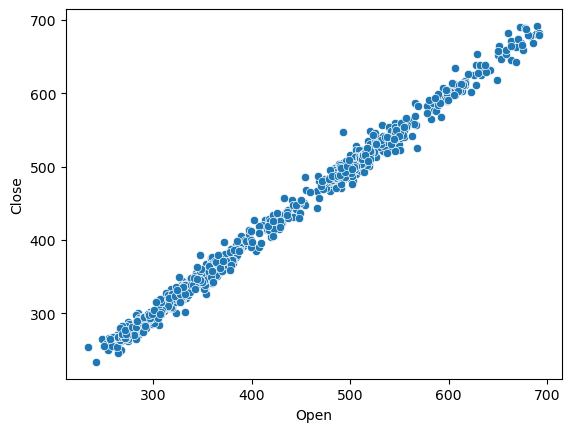

In [22]:
sns.scatterplot(x=df['Open'],y=df['Close'])

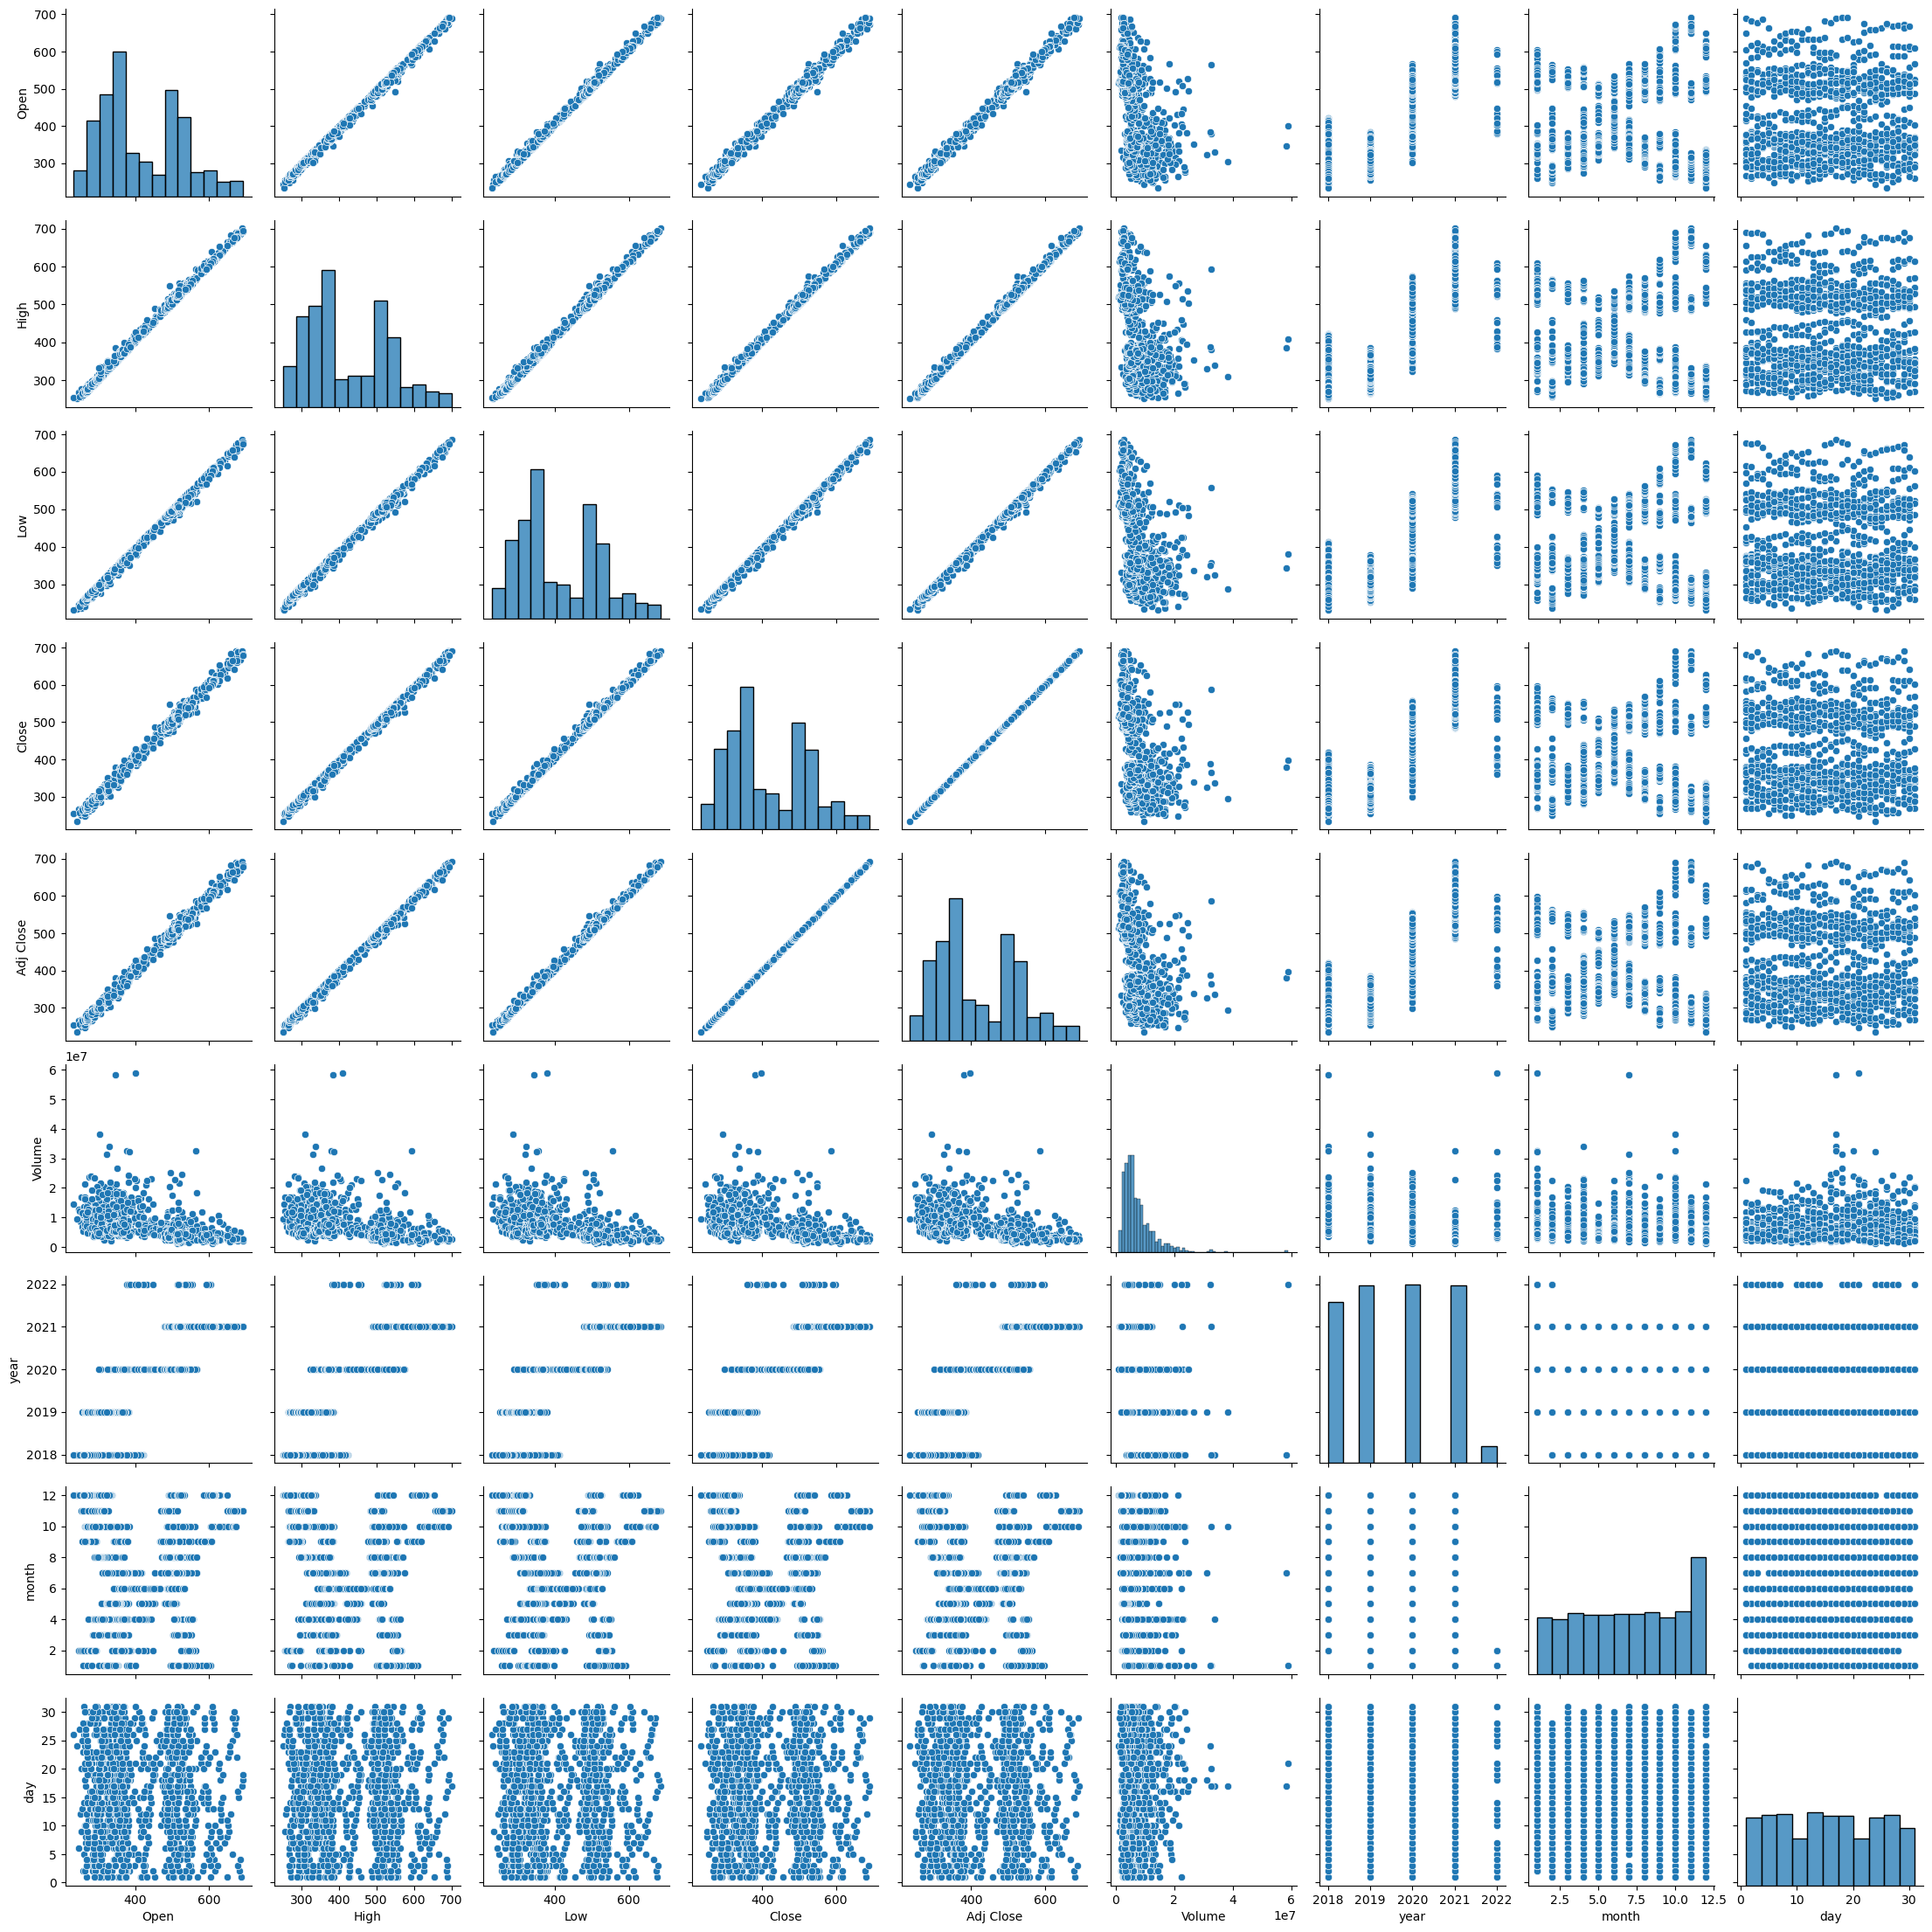

In [23]:
sns.pairplot(df)

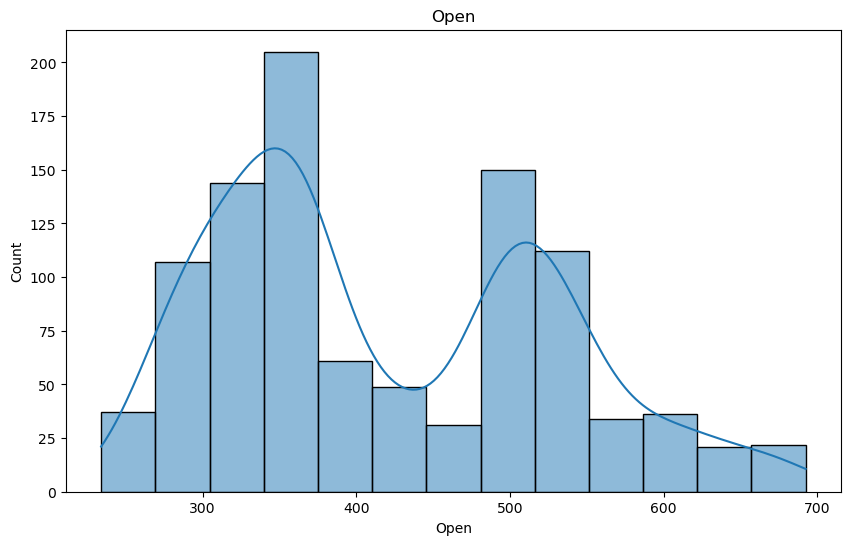

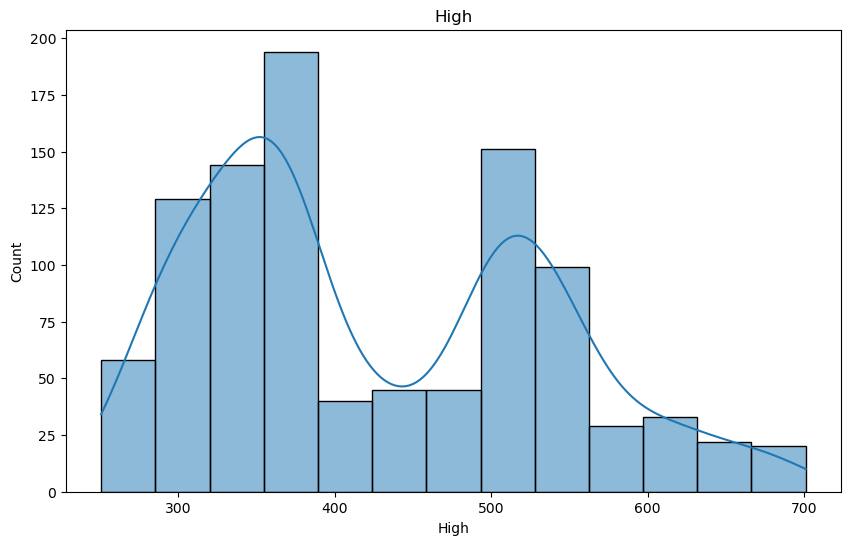

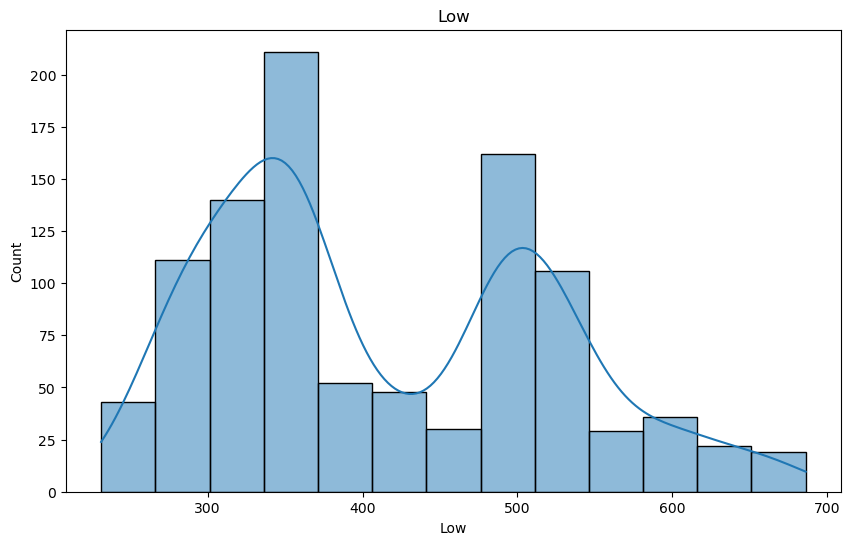

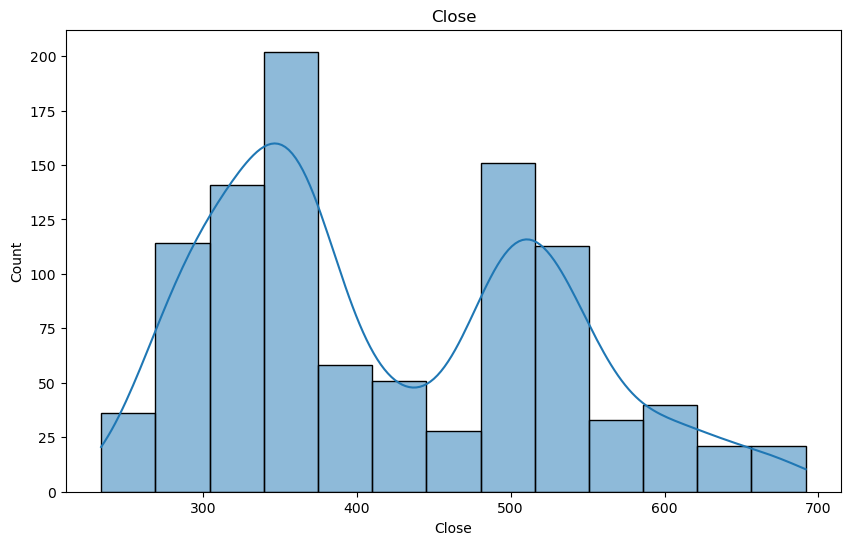

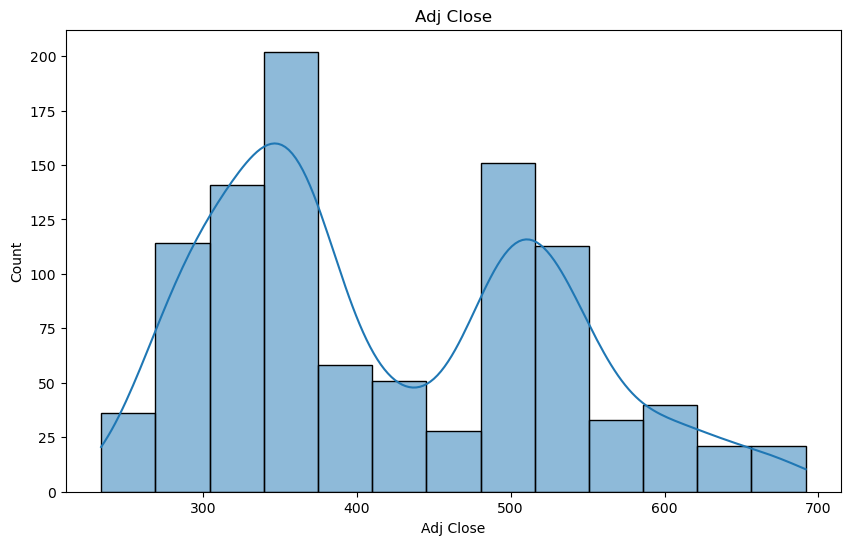

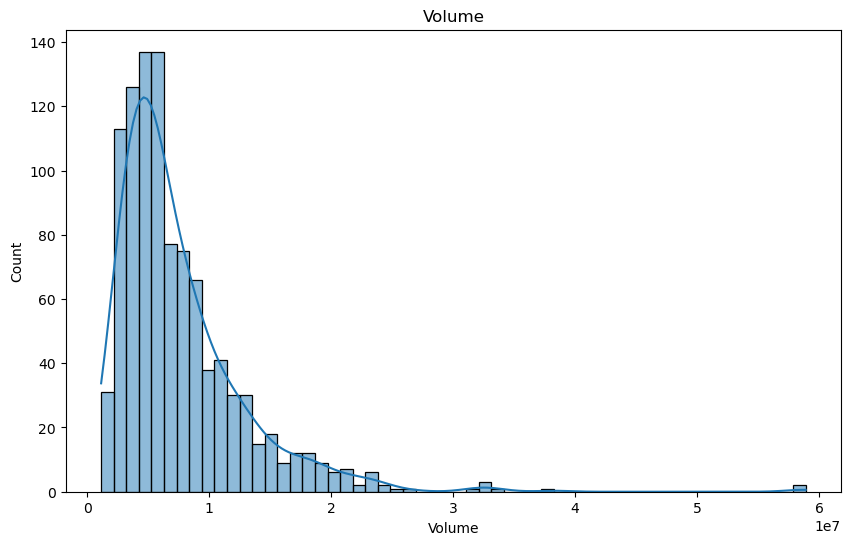

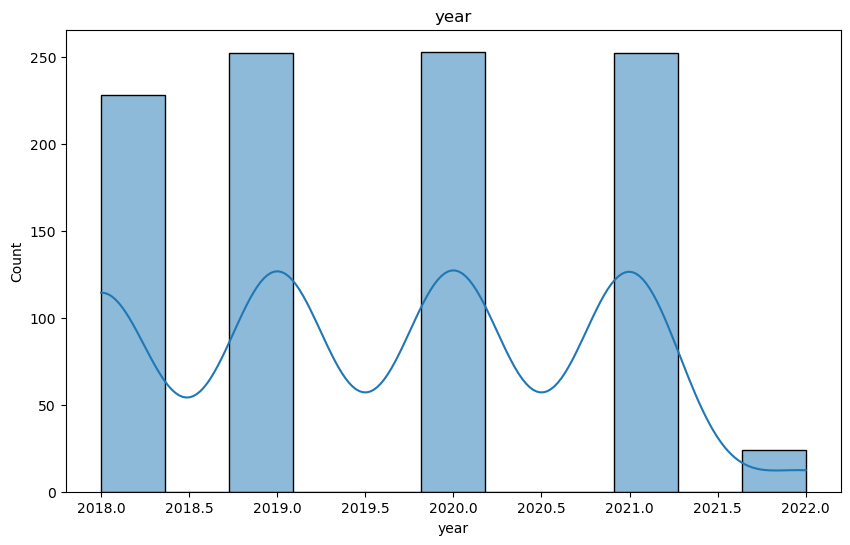

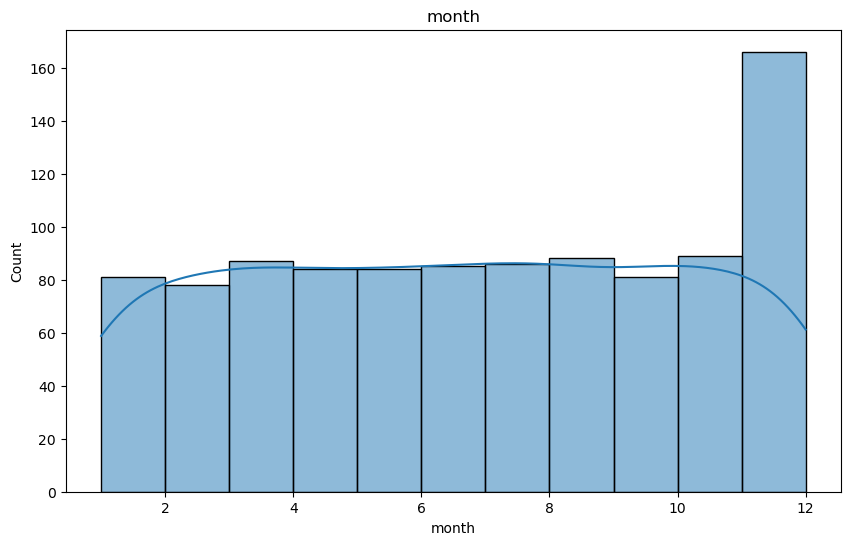

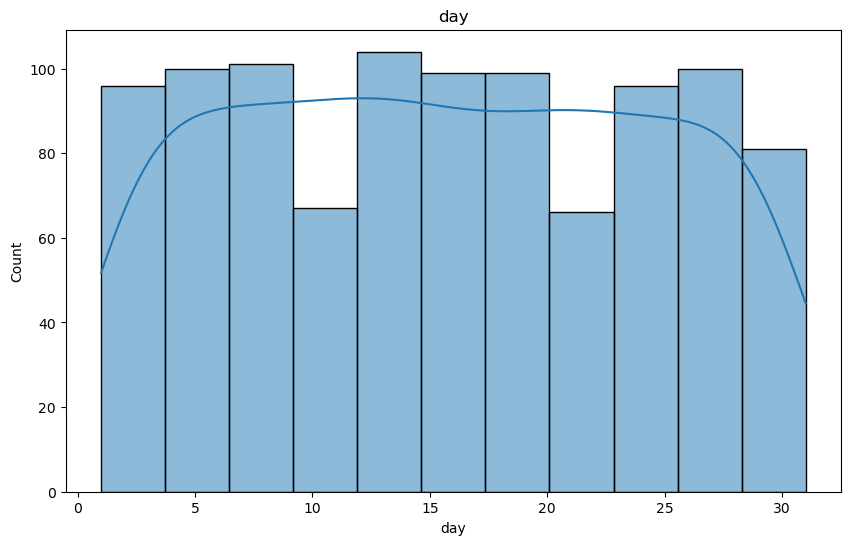

In [25]:
for i in df.columns:
    plt.figure(figsize=(10,6))
    sns.histplot(df[i],kde=True)
    plt.title(i)
    plt.show()

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1009 non-null   float64
 1   High       1009 non-null   float64
 2   Low        1009 non-null   float64
 3   Close      1009 non-null   float64
 4   Adj Close  1009 non-null   float64
 5   Volume     1009 non-null   int64  
 6   year       1009 non-null   int32  
 7   month      1009 non-null   int32  
 8   day        1009 non-null   int32  
dtypes: float64(5), int32(3), int64(1)
memory usage: 59.2 KB


In [27]:
X=df.drop(['Close'],axis=1)
y=df['Close']

In [28]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,year,month,day
0,262.000000,267.899994,250.029999,254.259995,254.259995,11896100,2018,2,5
1,247.699997,266.700012,245.000000,265.720001,265.720001,12595800,2018,2,6
2,266.579987,272.450012,264.329987,264.559998,264.559998,8981500,2018,2,7
3,267.079987,267.619995,250.000000,250.100006,250.100006,9306700,2018,2,8
4,253.850006,255.800003,236.110001,249.470001,249.470001,16906900,2018,2,9


In [30]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()

In [31]:
from sklearn.preprocessing import StandardScaler
st=StandardScaler()

In [32]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import  GridSearchCV

In [37]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
pipeline = Pipeline([
    ('power', PowerTransformer(method='yeo-johnson')),
    ('scaler', StandardScaler()),
     ('model', Ridge())
    
])


In [34]:
param_grid = {
    'model__alpha': [0.1, 1.0, 10.0]
}

In [38]:
grid = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2')
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('power', PowerTransformer()),
                                       ('scaler', StandardScaler()),
                                       ('model', Ridge())]),
             param_grid={'model__alpha': [0.1, 1.0, 10.0]}, scoring='r2')

In [40]:
best_model = grid.best_estimator_
best_model

Pipeline(steps=[('power', PowerTransformer()), ('scaler', StandardScaler()),
                ('model', Ridge(alpha=0.1))])

In [41]:
y_pred = best_model.predict(X_test)

In [42]:
from sklearn.metrics import r2_score, mean_squared_error

print("Best Model:", grid.best_params_)
print("R2 Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


Best Model: {'model__alpha': 0.1}
R2 Score: 0.9853755825833423
RMSE: 13.058390638407184


In [43]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

In [ ]:
# ===========================================
models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.01),
    "RandomForest": RandomForestRegressor(n_estimators=200, random_state=42),
    "GradientBoosting": GradientBoostingRegressor(n_estimators=200, random_state=42),
    "XGBRegressor": XGBRegressor(n_estimators=200, learning_rate=0.1, random_state=42, verbosity=0)
}